In [2]:
import fastbook
fastbook.setup_book()

C:\Python399\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
from fastbook import *

In [12]:
from fastai.vision.all import *
path = Path('datasets')

In [13]:
path

Path('datasets')

In [18]:
chess = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(size=460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Python399\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


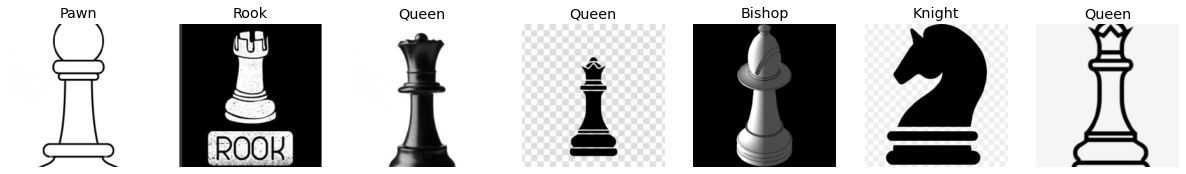

In [19]:
dls = chess.dataloaders(path)
dls.valid.show_batch(max_n=7, nrows=1)

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\bdacosta/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 31.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.430715,1.296858,0.470149,02:44


C:\Python399\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.433262,0.857545,0.298507,02:48
1,1.070723,0.717709,0.231343,02:52


In [6]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

Path('datasets/bishopImages')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)